In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./publication/riepilogoArchivio.csv', parse_dates=['datetime'])

In [3]:
data.head()

,Regione,Ricoverati con sintomi,Terapia intensiva,Isolamento domiciliare,Totale attualmente positivi,DIMESSI GUARITI,DECEDUTI,CASI TOTALI,TAMPONI,datetime,aggiornamento,fonte
0,Lombardia,1622.0,309.0,77.0,2008.0,469.0,135.0,2612,13556.0,2020-03-06,pomeridiano,http://www.protezionecivile.gov.it/attivita-ri...
1,Emilia Romagna,397.0,53.0,366.0,816.0,17.0,37.0,870,3136.0,2020-03-06,pomeridiano,http://www.protezionecivile.gov.it/attivita-ri...
2,Veneto,117.0,27.0,310.0,454.0,22.0,12.0,488,13023.0,2020-03-06,pomeridiano,http://www.protezionecivile.gov.it/attivita-ri...
3,Marche,73.0,20.0,62.0,155.0,NaN,4.0,159,585.0,2020-03-06,pomeridiano,http://www.protezionecivile.gov.it/attivita-ri...
4,Piemonte,57.0,30.0,52.0,139.0,NaN,4.0,143,793.0,2020-03-06,pomeridiano,http://www.protezionecivile.gov.it/attivita-ri...


In [4]:
def byregion(data,region):
    ret = pd.DataFrame(data[(data['Regione']==region) & (data['aggiornamento']=='pomeridiano')])
    ret.set_index('datetime',inplace=True)
    return ret

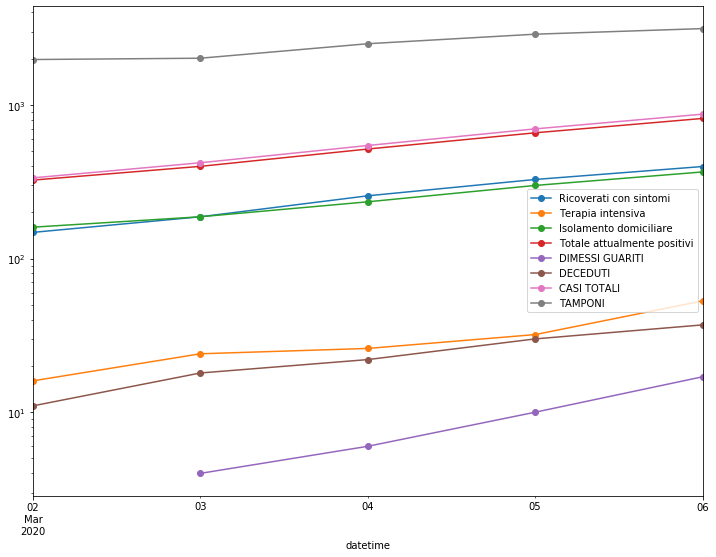

In [5]:
byregion(data,'Emilia Romagna').plot(figsize=(12,9), logx=True, logy=True, style='o-')

In [6]:
data_Italy_CT_T=pd.DataFrame((data[data['aggiornamento']=='pomeridiano'][['CASI TOTALI','TAMPONI','datetime']]).groupby(['datetime']).sum())

In [7]:
data_Italy_CT_T['ratio'] = data_Italy_CT_T['CASI TOTALI']/data_Italy_CT_T['TAMPONI']

In [8]:
data_Italy_CT_T

,CASI TOTALI,TAMPONI,ratio
datetime,,,
2020-02-24,223,0.0,inf
2020-02-25,321,0.0,inf
2020-02-26,400,0.0,inf
2020-02-27,650,0.0,inf
2020-02-28,888,0.0,inf
2020-02-29,1128,0.0,inf
2020-03-01,1694,0.0,inf
2020-03-02,2036,23345.0,0.087214
2020-03-03,2502,25856.0,0.096767


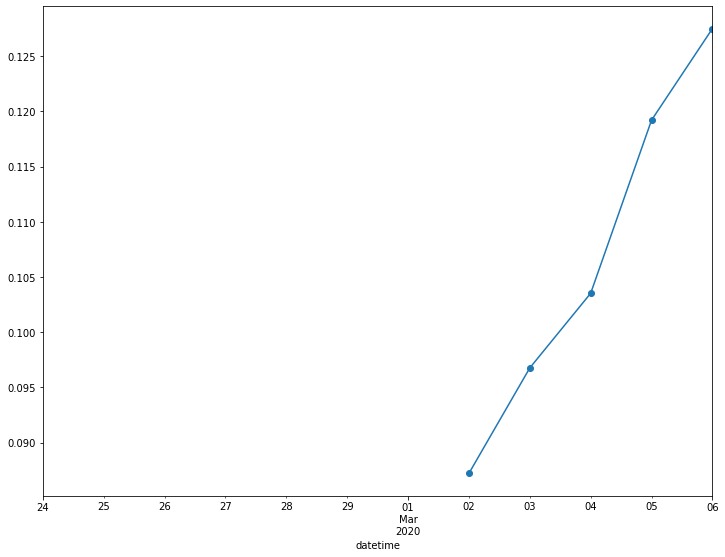

In [9]:
data_Italy_CT_T['ratio'].plot(figsize=(12,9), style='o-')

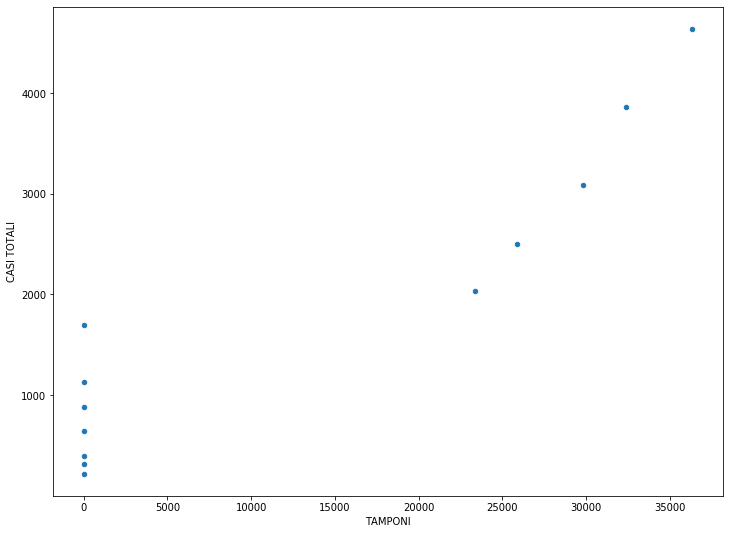

In [10]:
data_Italy_CT_T.plot.scatter(y='CASI TOTALI', x='TAMPONI', figsize=(12,9))

In [11]:
data_Italy_CT_T_200306 = pd.DataFrame(data[(data['aggiornamento']=='pomeridiano') & (data['datetime']=='2020-03-06')][['Regione','CASI TOTALI','TAMPONI']])

In [12]:
data_Italy_CT_T_200306['ratio'] = data_Italy_CT_T_200306['CASI TOTALI']/data_Italy_CT_T_200306['TAMPONI']

In [13]:
data_Italy_CT_T_200306

,Regione,CASI TOTALI,TAMPONI,ratio
0,Lombardia,2612,13556.0,0.192682
1,Emilia Romagna,870,3136.0,0.277423
2,Veneto,488,13023.0,0.037472
3,Marche,159,585.0,0.271795
4,Piemonte,143,793.0,0.180328
5,Toscana,79,1097.0,0.072015
6,Lazio,54,1373.0,0.039330
7,Campania,57,471.0,0.121019
8,Liguria,32,229.0,0.139738
9,Friuli V.G.,31,577.0,0.053726


In [14]:
data_Italy_CT_T_timeseries = pd.DataFrame(data[(data['aggiornamento']=='pomeridiano') ][['datetime','Regione','CASI TOTALI','TAMPONI']])
data_Italy_CT_T_timeseries['ratio'] = data_Italy_CT_T_timeseries['CASI TOTALI']/data_Italy_CT_T_timeseries['TAMPONI']
data_Italy_CT_T_timeseries.dropna(inplace=True)
data_Italy_CT_T_timeseries.set_index(['Regione', 'datetime'], inplace=True)

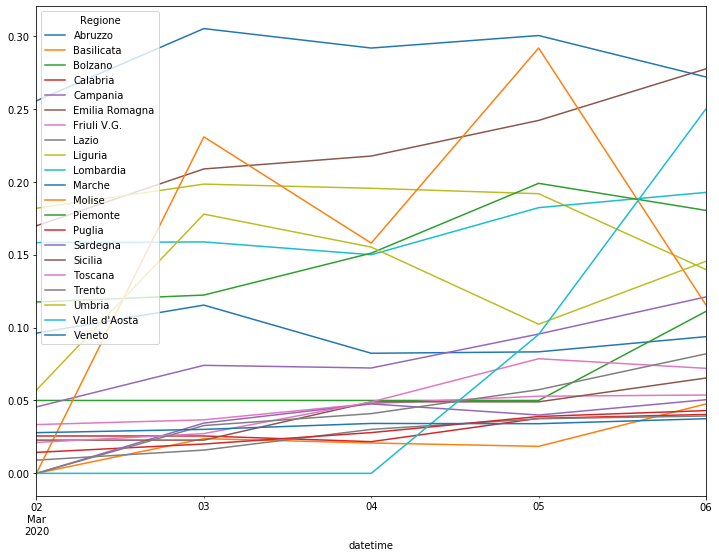

In [15]:
data_Italy_CT_T_timeseries['ratio'].unstack(0).plot(figsize=(12,9))

In [16]:
ratio_summary = pd.DataFrame(data_Italy_CT_T_timeseries['ratio'].groupby(['datetime']).agg([np.mean, np.std]))

In [17]:
ratio_summary

,mean,std
datetime,,
2020-03-02,0.061246,0.073529
2020-03-03,0.090993,0.088328
2020-03-04,0.090133,0.078627
2020-03-05,0.108471,0.088451
2020-03-06,0.115722,0.078057


In [ ]:
ratio_summary.plot(figsize=(12,9), style='o',capsize=4, yerr = 'std')

In [ ]:
ax1 = data[(data['TAMPONI']>0) & (data['datetime']=='2020-03-06')].plot.scatter(y='CASI TOTALI', x='TAMPONI', figsize=(12,9))